## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 確認硬體資源
"""
Your code here
"""
# !nvidia-smi

/bin/sh: nvidia-smi: command not found


In [2]:
import os
import keras

# Try to enable GPU (optional)


/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y  

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
"""
Your code here
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [8]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [9]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 8s 154us/step - loss: 1.9400 - acc: 0.3022 - val_loss: 1.7696 - val_acc: 0.3642
Epoch 2/100
50000/50000 [==============================] - 7s 142us/step - loss: 1.7001 - acc: 0.3918 - val_loss: 1.6598 - val_acc: 0.3942
Epoch 3/100
50000/50000 [==============================] - 7s 143us/step - loss: 1.6142 - acc: 0.4266 - val_loss: 1.5976 - val_acc: 0.4312
Epoch 4/100
50000/50000 [==============================] - 7s 143us/step - loss: 1.5518 - acc: 0.4468 - val_loss: 1.5359 - val_acc: 0.4570
Epoch 5/100
50000/50000 [==============================] - 7s 143us/step - loss: 1.4998 - acc: 0.4656 - val_loss: 1.5249 - val_acc: 0.4591
Epoch 6/100
50000/50000 [==============================] - 7s 144us/step - loss: 1.4674 - acc: 0.4780 - val_loss: 1.5326 - val_acc: 0.4497
Epoch 7/100
50000/50000 [==============================] - 7s 145us/step - loss: 1.4329 - acc: 0.4912 - val_loss: 1.

50000/50000 [==============================] - 8s 158us/step - loss: 0.5004 - acc: 0.8191 - val_loss: 2.0548 - val_acc: 0.5153
Epoch 60/100
50000/50000 [==============================] - 8s 152us/step - loss: 0.5035 - acc: 0.8191 - val_loss: 2.0859 - val_acc: 0.5137
Epoch 61/100
50000/50000 [==============================] - 7s 139us/step - loss: 0.5005 - acc: 0.8201 - val_loss: 2.1097 - val_acc: 0.5120
Epoch 62/100
50000/50000 [==============================] - 7s 140us/step - loss: 0.4769 - acc: 0.8284 - val_loss: 2.1470 - val_acc: 0.5140
Epoch 63/100
50000/50000 [==============================] - 7s 145us/step - loss: 0.4820 - acc: 0.8265 - val_loss: 2.1705 - val_acc: 0.5099
Epoch 64/100
50000/50000 [==============================] - 7s 150us/step - loss: 0.4592 - acc: 0.8370 - val_loss: 2.2731 - val_acc: 0.5110
Epoch 65/100
50000/50000 [==============================] - 8s 159us/step - loss: 0.4514 - acc: 0.8382 - val_loss: 2.2425 - val_acc: 0.5151
Epoch 66/100
50000/50000 [=======

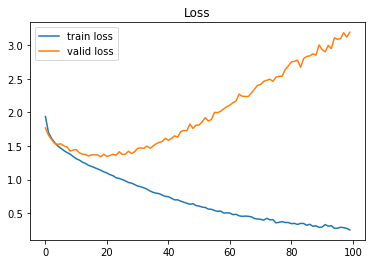

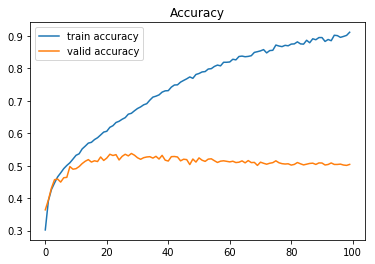

In [11]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()